In [1]:
import os
import math
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
fb=pd.read_excel(r"E:\ds course\data sets\prac data sets\Fiberbits_v1.xlsx")

In [3]:
fb.shape

(100000, 9)

In [4]:
fb.head()

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,85,4,1,0,121,4,85
1,0,1581,85,4,1,0,133,4,85
2,0,1594,82,4,1,0,118,4,85
3,0,1594,82,4,1,0,123,4,85
4,1,1609,80,4,1,0,177,4,85


In [5]:
x_train=fb.drop(["active_cust"],axis=1)
y_train=fb["active_cust"]

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
rf=RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [19]:
rf=RandomForestClassifier(n_jobs=1,verbose=1,random_state=42,oob_score=True)
rf.fit(x_train,y_train)
rf.get_params()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.6s finished


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 1,
 'warm_start': False}

In [20]:
rf.oob_score_

0.8812

In [21]:
rf.feature_importances_

array([0.19359065, 0.10179482, 0.01204988, 0.12963119, 0.10762969,
       0.15607144, 0.08014615, 0.21908617])

In [22]:
pd.DataFrame(list(zip(x_train.columns,rf.feature_importances_)))

,0,1
0,income,0.193591
1,months_on_network,0.101795
2,Num_complaints,0.012050
3,number_plan_changes,0.129631
4,relocated,0.107630
5,monthly_bill,0.156071
6,technical_issues_per_month,0.080146
7,Speed_test_result,0.219086


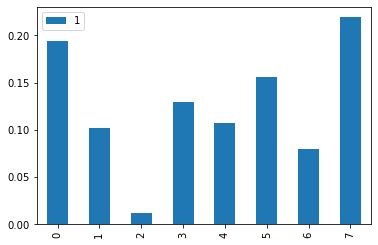

In [23]:
pd.DataFrame(list(zip(x_train.columns,rf.feature_importances_))).plot(kind="bar")

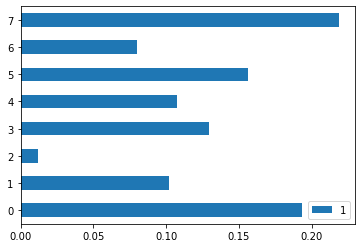

In [24]:
pd.DataFrame(list(zip(x_train.columns,rf.feature_importances_))).plot(kind="barh")

In [25]:
importance=rf.feature_importances_

In [26]:
features=list(x_train.columns)

In [27]:
indices=np.argsort(rf.feature_importances_)

In [28]:
sorted(rf.feature_importances_)

[0.012049881673373772,
 0.08014615265066749,
 0.1017948200002898,
 0.10762969383395565,
 0.12963118930721035,
 0.15607143927792677,
 0.19359065087999253,
 0.21908617237658365]

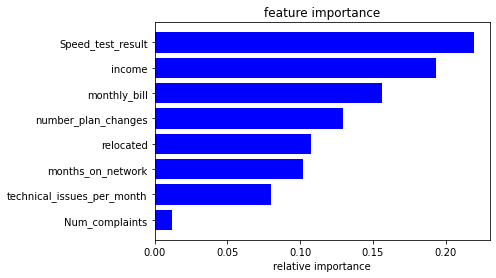

In [29]:
plt.barh(range(len(indices)),importance[indices],color="b",align="center")
plt.xlabel("relative importance")
plt.yticks(range(len(indices)),[features[i]for i in indices])
plt.title("feature importance")
plt.show()